In [6]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.3 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.0 MB 1.9 MB/s eta 0:00:06
   ------ --------------------------------- 1.8/11.0 MB 2.5 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.0 MB 4.4 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 6.5 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.0 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 6.5 MB/s eta 0:00:01
   ----------------------

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

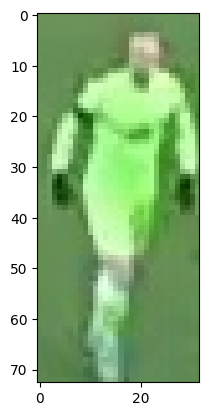

In [3]:
plt.imshow(image)
plt.show()

# take the top half of the iamge

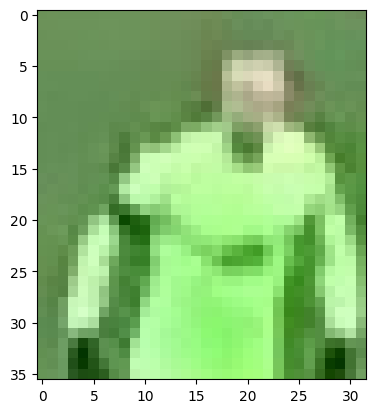

In [4]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# cluster the image into two clusters

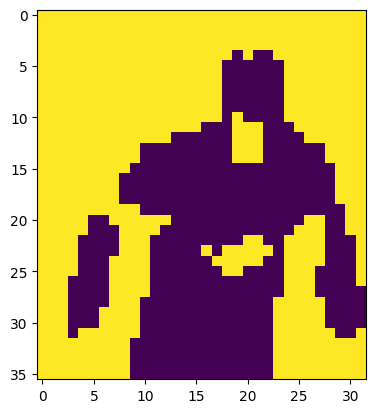

In [8]:
#reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

#perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels = kmeans.labels_

#reshape the labels into the originam image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#display the clustered image
plt.imshow(clustered_image)
plt.show()


In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1,0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

1


In [10]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [11]:
kmeans.cluster_centers_[player_cluster]

array([173.48484848, 238.08225108, 148.44155844])